# 2. EDA: 데이터 전처리  
#### 2020_10_21

In [1]:
# data preprocessing
import pandas as pd
import numpy as np
# data visualization
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud

# sklearn 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

import re
import ast # 형변환 

from pprint import pprint as pp
import warnings
warnings.filterwarnings(action='ignore')

# 텍스트 마이닝
from eunjeon import Mecab
import nltk
from konlpy.tag import Okt
from nltk import FreqDist
from gensim.models import Word2Vec

In [2]:
# font
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   

## 1. 데이터 불러오기 

In [3]:
# import data
df_raw = pd.read_csv("./combined_final_20170101_20201013")

# 활용 데이터 프레임화 
df = df_raw
del df['Unnamed: 0']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324702 entries, 0 to 324701
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   desertionno   324702 non-null  int64  
 1   popfile       324702 non-null  object 
 2   happendt      324702 non-null  int64  
 3   happenplace   324702 non-null  object 
 4   kindcd        324702 non-null  object 
 5   colorcd       324702 non-null  object 
 6   age           324702 non-null  object 
 7   weight        324702 non-null  object 
 8   noticeno      324701 non-null  object 
 9   noticesdt     324702 non-null  int64  
 10  noticeedt     324702 non-null  int64  
 11  sexcd         324702 non-null  object 
 12  neuteryn      324702 non-null  object 
 13  specialmark   324702 non-null  object 
 14  carenm        324702 non-null  object 
 15  orgnm         324702 non-null  object 
 16  processstate  324702 non-null  object 
 17  type          324702 non-null  object 
 18  lat 

In [4]:
df.shape

(324702, 20)

In [5]:
df.head()

,desertionno,popfile,happendt,happenplace,kindcd,colorcd,age,weight,noticeno,noticesdt,noticeedt,sexcd,neuteryn,specialmark,carenm,orgnm,processstate,type,lat,long
0,448535202001458,http://www.animal.go.kr/files/shelter/2020/07/...,20201013,김해시 주촌면 서부로1563번길 54,[개] 믹스견,검흰,2016(년생),8(Kg),경남-김해-2020-01466,20201015,20201026,F,U,1469,유기동물및관리협회,경상남도 김해시,보호중,dog,35.228545,128.889352
1,446500202000046,http://www.animal.go.kr/files/shelter/2020/10/...,20201013,군내면 송산길 118,[개] 믹스견,황색,2019(년생),7(Kg),전남-진도-2020-00046,20201015,20201022,F,N,매우 사나움,진도개메디컬센터,전라남도 진도군,보호중,dog,34.486871,126.263485
2,446500202000045,http://www.animal.go.kr/files/shelter/2020/10/...,20201013,군내면 송산길 118,[개] 믹스견,백색,2020(년생),10(Kg),전남-진도-2020-00045,20201015,20201022,M,N,매우 사나움,진도개메디컬센터,전라남도 진도군,보호중,dog,34.486871,126.263485
3,446500202000044,http://www.animal.go.kr/files/shelter/2020/10/...,20201013,고군면 가계길 26-10,[개] 믹스견,황색,2019(년생),15(Kg),전남-진도-2020-00044,20201015,20201022,F,N,사나움,진도개메디컬센터,전라남도 진도군,보호중,dog,34.486871,126.263485
4,446499202000215,http://www.animal.go.kr/files/shelter/2020/07/...,20201013,금일 월송리 마을야산,[개] 믹스견,흰색,2017(년생),14(Kg),전남-완도-2020-00218,20201015,20201024,F,N,"귀쪽 갈색,온순한편",유기동물임시보호센터,전라남도 완도군,보호중,dog,34.311060,126.755054


## 2. 변수 탐색 

## (변수 측정 방법 및 척도 수준)
### 1. 질적 변수 
##### desrtionno: 유기번호 -  명목척도 / 독립변수
##### happenPlace	발견장소 - 명목척도  / 독립변수
##### kindCd	품종 - 명목척도  / 독립변수
##### colorCd	색상 - 명목척도  / 독립변수
##### processState 상태  - 명목척도 / 종속변수
##### sexCd	성별  - 명목척도  / 독립변수 
##### neuterYn 중성화여부  - 명목척도  / 독립변수
##### specialMark	특징  - 명목척도  / 독립변수
##### careNm	보호소이름  - 명목척도  / 독립변수
##### orgNm	관할기관 - 명목척도  / 독립변수			
##### type 동물종류 - 명목척도 / 독립변수 
##### noticeNo 공고번호 - 명목척도 / 독립변수																				

### 2. 양적 변수 
##### age	나이 - 간격척도  / 독립변수
##### happenDt: 접수일 - 분석 목적에 따라 순서/간격 척도  / 독립변수
##### noticeSdt	공고시작일 - 분석 목적에 따라 순서/간격 척도  / 독립변수
##### noticeEdt	공고종료일 - 분석 목적에 따라 순서/간격 척도  / 독립변수

## 3. 결측치/이(상한)상치 처리

In [6]:
# 결측치 확인  
df.noticeno.isnull().unique()
df[df['noticeno'].isnull() == True]
# 결측치 처리 
# df.noticeno = df.noticeno.fillna('9999')
df.noticeno = df.noticeno.fillna(np.nan)

# # 삭제 
# a = df[df['noticeno'].isnull() == True].index
# df = df.drop(a)

In [7]:
# 날짜 데이터 이상치 확인 및 데이터 변경 

df.iloc[231419, :] #2170918 --> '2017098' 
df.noticeedt[231419] = '20170918'

df.iloc[231489, :] #2170921 --> '20170921' 
df.noticeedt[231489] = '20170921' 

In [8]:
# 년생 age 이상치 확인 및 데이터 삭제 처리 

def age_in_year(born_year):
    p = re.compile('\d{4}\(\년\생\)')
    m = p.match(born_year)
    if m:
        return(born_year)
    else:
        return('0')

q = df.age
w = list(q.map(age_in_year))
e = w.count('0')

# e = list(df.age.map(age_in_year)).count('0')

z = []
for i in range(0, len(w)):
    if w[i] == '0':
        z.append(i)

# df = df.drop(z) # 행 삭제

df['age'] = df['age'].map(lambda x: x[0:4])

In [9]:
# 년생 결측치 처리 
df.age[z] = np.nan

In [10]:
df['age'].unique()

array(['2016', '2019', '2020', '2017', '2013', '2018', '2012', '2015',
       '2014', '2011', '2005', '2010', '2008', '2007', '2006', '2003',
       '2002', '2009', '2004', '1999', '2000', '2001', nan, '1998',
       '1996', '1997', '1995', '1991', '1988', '1992'], dtype=object)

##  4. 데이터 형변환
##### 데이터 변수 성격에 따른 알맞은 데이터 형변환

In [11]:
# 날짜 타입으로 바꾸기 

def int_to_date(col_name):
    col_name = col_name.astype(str)
    col_name = col_name.str[0:4] + "/" + col_name.str[4:6] + "/" + col_name.str[6:8] 
    col_name = col_name.astype('datetime64[ns]')
    
    return col_name

df.happendt = int_to_date(df.happendt)
df.noticesdt = int_to_date(df.noticesdt)
df.noticeedt = int_to_date(df.noticeedt)

## 참고: 날짜 데이터 년/월/일 추출 함수 
# df.happendt.dt.year
# df.happendt.dt.month
# df.happendt.dt.day


##  5. 질적 변수 : 데이터 범주화 categorizing/factoring

In [12]:
df.processstate.value_counts()

종료(자연사)    98836
종료(입양)     95112
종료(안락사)    66169
종료(반환)     35481
보호중        18044
종료(기증)      5733
종료(방사)      4161
종료(미포획)     1166
Name: processstate, dtype: int64

In [13]:
# 상태 범주화 : 입양 1, 나머지 0
def processstate_to_int(processstate):
    
    if processstate =='종료(입양)':
        return 1
    else: 
        return 0
    
df['processstate_adopt'] = df.processstate.map(processstate_to_int)
df.processstate_adopt = df.processstate_adopt.fillna('0')
df.processstate_adopt.value_counts()

0    229590
1     95112
Name: processstate_adopt, dtype: int64

In [14]:
# 상태 범주화 : 입양 1, 나머지 0
def processstate_to_int(processstate):
    
    if processstate =='종료(안락사)':
        return 1
    else: 
        return 0
    
df['processstate_euthanize'] = df.processstate.map(processstate_to_int)
df.processstate_euthanize = df.processstate_euthanize.fillna('0')
df.processstate_euthanize.value_counts()

0    258533
1     66169
Name: processstate_euthanize, dtype: int64

In [15]:
# 성별 범주화 
def gender_to_int(gender):

    if gender=='F':
        gender = 1
    elif gender=='M':
        gender = 0
    else:
        gender = 2
    return gender

df['sexcd'] = df.sexcd.map(gender_to_int)

In [16]:
# 중성화 여부
def neuteryn_to_int(neuteryn):

    if neuteryn=='N':
        neuteryn = 0
    elif neuteryn =='Y':
        neuteryn = 1
    else:
        neuteryn = 2
    return neuteryn

df['neuteryn'] = df.neuteryn.map(neuteryn_to_int)

In [17]:
# 반려동물 타입 : 1 = dog, 0 = cat
df.type = df.type.apply(lambda x : '1' if x == 'dog' else '0')

#### ( 색상 color : 범주형 데이터 수치화 )

In [18]:
# 상위 5개 색상으로 구분: 검정 / 흰색 / 갈색 / 회색 / 노랑 
# 5개 색상 컬럼 생성 후, 해당되는 색 컬럼에 1 표시
# 즉, 여러 색상 포함하는 경우 해당 모든 컬럼에 1 표시


# 결측치: 5개 컬럼 모두 0으로 표시
# 1) 상위 5개 색상에 포함되지 않는 경우: ex) 살구색, 블루, 분홍색...
# 2) 색상 판단 불가한 경우: ex) 점박이, 삼색, 파티색, 얼룩무늬...
# 3) 색상이 아닌 주소/성격/품종/나이 등이 입력된 경우
# 4) 숫자 또는 공백이 입력된 경우


# 강아지+고양이 총 324,657행 중 16,087행이 결측치

# 색 분류 참고
# 고등어 -> brown
# 호구   -> brown, yellow
# 호피   -> brown, black
# 재구   -> brown, yellow

In [19]:
# 색깔 파생변수 생성 
df['blc_col'] = 100
df['brown_col'] = 100
df['white_col'] = 100
df['grey_col'] = 100
df['yellow_col'] = 100

In [20]:
# 특수문자 제거 
def cleanse(x):
    x = x.strip()
    x = x.replace(".", "")
    x = x.replace("/", "")
    x = x.replace("+", "")
    x = x.replace(",", "")
    x = x.replace("&", "")
    x = x.replace("-", "")
    x = x.replace(" ", "")
    x = x.replace("(", "")
    x = x.replace(")", "")
    x = x.replace(";", "")
    return x

df['colorcd'] = df.colorcd.map(cleanse)

In [21]:
a = df.colorcd.unique()
clist = a.tolist()
clist

['검흰',
 '황색',
 '백색',
 '흰색',
 '회색',
 '흰갈',
 '검갈',
 '흰갈검',
 '검정',
 '흰색검은색',
 '검은색갈색',
 '노랑흰색',
 '흰색검정',
 '노랑',
 '노랑검정',
 '검정색',
 '갈색',
 '누런색',
 '흰황색',
 '은황색',
 '흰갈색',
 '흰검정',
 '흰색갈검색',
 '갈색검정',
 '흰',
 '검갈흰',
 '갈흰',
 '갈흰검',
 '연갈색',
 '흰색갈색',
 '검정황색',
 '흰갈회',
 '황',
 '갈색흰색',
 '호반색',
 '비글잡종갈색',
 '갈검흰',
 '갈검색',
 '아이보리',
 '파티',
 '화이트',
 '회갈색',
 '흰색살구색',
 '연갈색크림색흰색갈색',
 '살구색크림색',
 '연갈색크림색흰색',
 '연갈색크림색',
 '검정색갈색흰색',
 '검정색갈색',
 '검정색흰색',
 '갈색검정색흰색',
 '흰색갈색얼룩',
 '크림색갈색얼룩흰색검은얼룩',
 '흰색에검은얼룩',
 '황색얼룩',
 '흰색과흑색혼합',
 '크림색',
 '황흑백',
 '흑황백',
 '황백',
 '황백흑',
 '흑백',
 '아이보리백',
 '얼룩흰색검정',
 '연한갈색',
 '검정가슴에흰색',
 '베이지색',
 '흰검색',
 '검갈색',
 '흰색바탕에입주변검정',
 '백석',
 '흰검',
 '갈검',
 '흑갈색',
 '검은색',
 '검정갈색',
 '검정흰색',
 '검백색',
 '검정붉은갈색',
 '흰색베이지색',
 '얼룩',
 '갈흑',
 '회백색',
 '살구색',
 '백',
 '기타',
 '옅은갈색',
 '블랙앤화이트',
 '흰색검정색',
 '갈회',
 '밤색',
 '갈백색',
 '백황',
 '백검',
 '진갈색',
 '브린들',
 '점박이색',
 '연갈',
 '블랙',
 '블랙브라운',
 '흰색검은점박이',
 '갈',
 '검정색황색',
 '갈색검정색',
 '검정갈색흰색',
 '검정=갈색흰색',
 '쥐갈색',
 '쥐색',
 '검갈블랙탄',
 '흰색크림색',
 '흰색갈색검정색',
 '흰색검정갈색',
 '골든',


In [22]:
def blc_tf(x):

        # ---------------------------------------- 검정 
        # 조심: 흑갈
        if x.find('검') + x.find('흑') + x.find('블랙') + x.find('black') + x.find('Black') + x.find('BLACK') + x.find('건정') + x.find('겁정') + x.find('까') + x.find('껌') + x.find('달마시안') + x.find('바둑') + x.find('불랙') + x.find('검졍') + x.find('젖소') + x.find('ㄱ머정') + x.find('감정') + x.find('거멍') + x.find('거멎ㅇ') + x.find('거정') + x.find('걸정') + x.find('블렉') + x.find('젓소') + x.find('깜') + x.find('블랜') + x.find('호피') + x.find('컴정') + x.find('훅색') > -28:
            return 1
        else: 
            return 0

In [23]:
def white_tf(x):

        # ---------------------------------------- 흰색 
        if x.find('흰') + x.find('백') + x.find('하') + x.find('벡') + x.find('크림') + x.find('아이보리') + x.find('희') + x.find('흐니') + x.find('휜') + x.find('white') + x.find('White') + x.find('WHITE') + x.find('힌') + x.find('크김') + x.find('화이트') + x.find('흐ㅟ') + x.find('달마시안') + x.find('바둑') + x.find('하얀') + x.find('환색') + x.find('횐') + x.find('흔색') + x.find('흼') + x.find('읜색') + x.find('읜') + x.find('젖소') + x.find('크리') + x.find('ㅎㄴ;섹') + x.find('하얀색') + x.find('흐ㅏㄴ') + x.find('희') + x.find('Ivory') + x.find('ivory') + x.find('젓소') + x.find('ㅎㄴ섹') + x.find('하얀색') + x.find('상아') + x.find('이아보리') + x.find('햐얀') + x.find('후ㅏㄴ샥') + x.find('힁') > -41:
            return 1
        else: 
            return 0

In [24]:
def grey_tf(x):

        # ---------------------------------------- 회색 
        if x.find('쥐') + x.find('회') + x.find('은색') + x.find('은회') + x.find('실버') + x.find('재색') + x.find('그레이') + x.find('잿') + x.find('제색') + x.find('차콜') + x.find('grey') + x.find('gray') + x.find('먹색') + x.find('홰색') + x.find('화색') + x.find('화섹') > -16 and x.find('검은색') == -1:
            return 1
        else: 
            return 0
        if x.find[0] == '은':
            return 1

In [25]:
def brown_tf(x):

        # ---------------------------------------- 갈색
        if x.find('갈') + x.find('밤') + x.find('브라운') + x.find('초코') + x.find('고동') + x.find('흑갈') + x.find('베이지') + x.find('갈흑') + x.find('연갈') + x.find('쵸코') + x.find('초콜') + x.find('황토') + x.find('배이지') + x.find('길색') + x.find('apricot') + x.find('Apricot') + x.find('rkftor') + x.find('SaltPepper') + x.find('강객') + x.find('강색') + x.find('걀색') + x.find('걸샥') + x.find('길섹') + x.find('에프리코트') + x.find('에프리푸들') + x.find('연베이') + x.find('커피') + x.find('흙') + x.find('Tan') + x.find('tan') + x.find('brown') + x.find('Brown') + x.find('BROWN') + x.find('초쿄') + x.find('칡') + x.find('코코아') + x.find('가랙') + x.find('간색') + x.find('감색') + x.find('애프리') + x.find('애프리콧') + x.find('에프리') + x.find('고등어') + x.find('고긍어') + x.find('고둥어') + x.find('고드엉') + x.find('고등') + x.find('고등러') + x.find('고등색') + x.find('고릉어') + x.find('공등어') + x.find('탄') + x.find('호피') + x.find('호구') + x.find('재구') + x.find('카카오') > -56:
            return 1
        else: 
            return 0

In [26]:
def yellow_tf(x):

        # ---------------------------------------- 노랑
        # 조심: 황토
        if x.find('황') + x.find('노랑') + x.find('골든') + x.find('옐') + x.find('금') + x.find('골') + x.find('누렁') + x.find('노란') + x.find('누') + x.find('치즈') + x.find('GOLD') + x.find('노') + x.find('모래') + x.find('yellow') + x.find('Yellow') + x.find('YELLOW') + x.find('ㅊㅣ즈') + x.find('치츠') + x.find('치느') + x.find('츠지') + x.find('gold') + x.find('ㄴ랑') + x.find('호구') + x.find('재구') > -24:
            return 1
        else: 
            return 0

In [27]:
df['blc_col'] = df.colorcd.map(blc_tf)

In [28]:
df['white_col'] = df.colorcd.map(white_tf)

In [29]:
df['grey_col'] = df.colorcd.map(grey_tf)

In [30]:
df['brown_col'] = df.colorcd.map(brown_tf)

In [31]:
df['yellow_col'] = df.colorcd.map(yellow_tf)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 324702 entries, 0 to 324701
Data columns (total 27 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   desertionno             324702 non-null  int64         
 1   popfile                 324702 non-null  object        
 2   happendt                324702 non-null  datetime64[ns]
 3   happenplace             324702 non-null  object        
 4   kindcd                  324702 non-null  object        
 5   colorcd                 324702 non-null  object        
 6   age                     324644 non-null  object        
 7   weight                  324702 non-null  object        
 8   noticeno                324701 non-null  object        
 9   noticesdt               324702 non-null  datetime64[ns]
 10  noticeedt               324702 non-null  datetime64[ns]
 11  sexcd                   324702 non-null  int64         
 12  neuteryn                324702

#### ( 품종 데이터 knm/kindcd : 범주형 데이터 수치화 )

In [33]:
# 원본 데이터 <-> 품종코드 데이터 컬럼명 동일하게 수정
df = df.rename({'kindcd':'knm'}, axis = 'columns')

# dog/cat 분류 
dog = df.iloc[:212618]
cat = df.iloc[212618:]

# 개/ 고양이 품종 데이터 import 
dog_kind = pd.read_csv('./dog_kind')
cat_kind = pd.read_csv('./cat_kind')

dog_kind.drop('Unnamed: 0', axis = 1, inplace = True)
cat_kind.drop('Unnamed: 0', axis = 1, inplace = True)

In [34]:
# 전처리 : 개/고양이 각 테이블의 [개]/[고양이] 문자열 strip (변수에 담아서 확인)
dog['knm'] = dog['knm'].str.lstrip('[개] ')
cat['knm'] = cat['knm'].str.lstrip('[고양이] ')

In [35]:
#  중복값 처리 : 도고 아르젠티노 kindcd 153번 삭제
dog_kind.drop(15, axis = 0, inplace = True )

In [36]:
# [고양이]로만 기재된 데이터는 믹스로 추정하여 코드부여
cat_kind.loc[36] = ['', 212]

# '페르시안페르시안 친칠라' 코드 페르시안페르시안-친칠라와 동일하게 부여
cat_kind.loc[37] = ['페르시안페르시안 친칠라', 197]

In [37]:
## 공백, 특수 문자 제거
dog['knm'].str.strip()
cat['knm'].str.strip()

212618          
212619          
212620          
212621          
212622          
           ...  
324697    한국 고양이
324698    한국 고양이
324699    한국 고양이
324700    한국 고양이
324701    한국 고양이
Name: knm, Length: 112084, dtype: object

In [38]:
def cleanText(dataframe):
 
    #텍스트에 포함되어 있는 특수 문자 제거
 
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', '', dataframe)
 
    return text

dog['knm'] = dog.knm.map(cleanText)
cat['knm'] = cat.knm.map(cleanText)

In [39]:
# knm을 key로 merge 진행
dog = pd.merge(dog, dog_kind, how='left', left_on='knm', right_on='knm')
cat = pd.merge(cat, cat_kind, how='left', left_on='knm', right_on='knm')

In [40]:
dog.kindcd.value_counts()

114.0    136960
72.0      13157
128.0     13093
67.0       7807
89.0       4412
          ...  
210.0         1
64.0          1
208.0         1
31.0          1
66.0          1
Name: kindcd, Length: 158, dtype: int64

In [41]:
# merge후 kindcd null값 확인
dog.kindcd.isnull().sum() # 2595

2595

In [42]:
# merge후 kindcd null값 확인
cat.kindcd.isnull().sum() # 4299

4299

In [43]:
# null 값인 행 눈으로 확인
dog[dog['kindcd'].isnull() == True]

,desertionno,popfile,happendt,happenplace,knm,colorcd,age,weight,noticeno,noticesdt,...,lat,long,processstate_adopt,processstate_euthanize,blc_col,brown_col,white_col,grey_col,yellow_col,kindcd
161,446498202000303,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,황룡면 필암리,리트리버,갈색,2017,8(Kg),전남-장성-2020-00303,2020-10-13,...,35.301833,126.784854,0,0,0,1,0,0,0,NaN
284,442419202001046,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-12,대안리,발바리,갈색,2018,3.2(Kg),강원-원주-2020-00865,2020-10-14,...,37.342219,127.920162,0,0,0,1,0,0,0,NaN
290,426330202000450,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-12,명안로 26번길 12-3,혼합,검정갈색,2020,2.1(Kg),부산-동래-2020-00358,2020-10-14,...,35.204858,129.083640,0,0,1,1,0,0,0,NaN
291,426330202000449,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-12,충렬대로 428번가길 19 남흥아파트 101동,혼합,흰색갈색,2018,3.5(Kg),부산-동래-2020-00357,2020-10-14,...,35.204858,129.083640,0,0,0,1,1,0,0,NaN
395,448546202000273,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-12,함양군 마천면 금계안길,믹스,흰갈,2019,3.6(Kg),경남-함양-2020-00121,2020-10-12,...,35.520461,127.725176,0,0,0,1,1,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212138,450650201704410,http://www.animal.go.kr/files/shelter/2017/10/...,2017-10-30,제주시 교래4길 10,허스키,흰검,2016,20(Kg),제주-제주-2017-03840,2017-10-31,...,33.489011,126.498302,1,0,1,0,1,0,0,NaN
212184,441405201701223,http://www.animal.go.kr/files/shelter/2017/11/...,2017-10-30,처인구청,시츄믹스추정,연한갈색,2014,3.85(Kg),경기-용인-2017-00711,2017-11-03,...,37.241086,127.177554,0,0,0,1,0,0,0,NaN
212257,441405201701221,http://www.animal.go.kr/files/shelter/2017/10/...,2017-10-31,양지cc주변,푸들믹스,흰색,2015,6.5(Kg),경기-용인-2017-00709,2017-10-31,...,37.241086,127.177554,0,0,0,0,1,0,0,NaN
212363,442424201700174,http://www.animal.go.kr/files/shelter/2017/11/...,2017-10-31,마달동 혜진아파트 5동 계단,발바리,검정믹스,2015,5(Kg),강원-삼척-2017-00179,2017-11-01,...,37.449868,129.165206,0,0,1,0,0,0,0,NaN


In [44]:
# 강아지

In [45]:
# null 대부분이 '믹스'관련인 것 파악 
# 믹스관련 강아지에 품종 코드 부여: mapping 방식 적용할 수 있는 함수 dog_mix --> 훨씬 빠름!
def dog_mix(x):
    
    if (x.find('믹스견') + x.find('mix') + x.find('잡종') +
       x.find('믹스') + x.find('혼종') + x.find('혼합')+
       x.find('+') + x.find('추정') + x.find('?')+
       x.find('발바리')  + x.find('기타') + x.find('믹')+ x.find('49856') + x.find('잡견')) > -14:
        return '믹스견'

    else:
        return x

In [46]:
def huski_dog(x):
    
    if x.find('허스') > -1:
        return '시베리안 허스키'

    else:
        return x

In [47]:
# 함수 mapping
dog['knm'] = dog.knm.map(dog_mix)
dog['knm'] = dog.knm.map(huski_dog)

In [48]:
dog.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212618 entries, 0 to 212617
Data columns (total 28 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   desertionno             212618 non-null  int64         
 1   popfile                 212618 non-null  object        
 2   happendt                212618 non-null  datetime64[ns]
 3   happenplace             212618 non-null  object        
 4   knm                     212618 non-null  object        
 5   colorcd                 212618 non-null  object        
 6   age                     212600 non-null  object        
 7   weight                  212618 non-null  object        
 8   noticeno                212617 non-null  object        
 9   noticesdt               212618 non-null  datetime64[ns]
 10  noticeedt               212618 non-null  datetime64[ns]
 11  sexcd                   212618 non-null  int64         
 12  neuteryn                212618

In [49]:
# 고양이

In [50]:
# 믹스관련 고양이에 품종 코드 부여: mapping 방식 적용할 수 있는 함수 cat_mix --> 훨씬 빠름!
def cat_mix(x):
    
    if (x.find('믹스묘') + x.find('mix') + x.find('잡종') +
       x.find('믹스') + x.find('혼종') + x.find('혼합')+
       x.find('+') + x.find('추정') + x.find('?')+
       x.find('발바리')  + x.find('기타') + x.find('믹') + x.find('54638')) > -13:
        return '믹스묘'

    else:
        return x

In [51]:
# 품종 '한국 고양이' 전처리
def korea_cat(x):
    
    if (x.find('코숏') + x.find('한국')) > -2:
        return '한국 고양이'

    else:
        return x

In [52]:
# 함수 mapping 
cat['knm'] = cat.knm.map(cat_mix)
cat['knm'] = cat.knm.map(korea_cat)

In [53]:
# 품종 전처리 후 다시 merge - 코드 부여
dog = pd.merge(dog, dog_kind, how='left', left_on='knm', right_on='knm')
cat = pd.merge(cat, cat_kind, how='left', left_on='knm', right_on='knm')

In [54]:
dog.head()

,desertionno,popfile,happendt,happenplace,knm,colorcd,age,weight,noticeno,noticesdt,...,long,processstate_adopt,processstate_euthanize,blc_col,brown_col,white_col,grey_col,yellow_col,kindcd_x,kindcd_y
0,448535202001458,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-13,김해시 주촌면 서부로1563번길 54,믹스견,검흰,2016,8(Kg),경남-김해-2020-01466,2020-10-15,...,128.889352,0,0,1,0,1,0,0,114.0,114.0
1,446500202000046,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,군내면 송산길 118,믹스견,황색,2019,7(Kg),전남-진도-2020-00046,2020-10-15,...,126.263485,0,0,0,0,0,0,1,114.0,114.0
2,446500202000045,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,군내면 송산길 118,믹스견,백색,2020,10(Kg),전남-진도-2020-00045,2020-10-15,...,126.263485,0,0,0,0,1,0,0,114.0,114.0
3,446500202000044,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,고군면 가계길 26-10,믹스견,황색,2019,15(Kg),전남-진도-2020-00044,2020-10-15,...,126.263485,0,0,0,0,0,0,1,114.0,114.0
4,446499202000215,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-13,금일 월송리 마을야산,믹스견,흰색,2017,14(Kg),전남-완도-2020-00218,2020-10-15,...,126.755054,0,0,0,0,1,0,0,114.0,114.0


In [55]:
# merge하면서 생긴 필요없는 컬럼 drop
dog.drop('kindcd_x', axis = 1, inplace = True)
cat.drop('kindcd_x', axis = 1, inplace = True)

In [56]:
# 컬럼명 재지정
dog = dog.rename({'kindcd_y':'kindcd'}, axis = 'columns')
cat = cat.rename({'kindcd_y':'kindcd'}, axis = 'columns')

In [57]:
# null kindcd는 9999로 처리
dog.kindcd = dog.kindcd.fillna(np.nan)
dog.kindcd.astype('float')

cat.kindcd = cat.kindcd.fillna(np.nan)
cat.kindcd.astype('float')

0         212.0
1         212.0
2         212.0
3         212.0
4         212.0
          ...  
112079    200.0
112080    200.0
112081    200.0
112082    200.0
112083    200.0
Name: kindcd, Length: 112084, dtype: float64

In [58]:
# 최종 dog, cat 데이터프레임 concat 진행
dog_cat = pd.concat([dog, cat])

In [59]:
df = dog_cat

##  6. 양적 변수 :  데이터 수정 

In [60]:
df.age.isna() == True

0         False
1         False
2         False
3         False
4         False
          ...  
112079    False
112080    False
112081    False
112082    False
112083    False
Name: age, Length: 324702, dtype: bool

In [61]:
# 나이 계산하기 - 태어난 년도를 n살로 바꾸기

null_list = df[df.age.isna() == True].index #결측 처리 데이터 9999 개수, 58개
len(null_list)

58

In [62]:
# 태어난 연도 - 공지 기준 연도 + 1
df['age'] = pd.DatetimeIndex(df.noticesdt).year - df.age.map(float) +1

In [63]:
df.age = df.age.map(float)

In [64]:
df.age[df.age < 0 ] = np.nan

In [65]:
df.age.iloc[null_list] = np.nan

In [66]:
# 체중 : 체중 표기 방법이 아닌경우, nan 리턴 


def weight_reg_01(x):
    
    x = str(x)
    idx = x.find('(') 
    x = x[:idx] 
    
    m = re.match('\d+\,+|\d+\;+|\d+\:+|\d+\/+|\d+\-+|\d+\~+', x) # 숫자 + 특수문자 

    if m:                                          # 특수 문자있는 경우 뒤에 절삭 
        start, end = m.span()
        x = x[:start+1]
#         x = x.replace(x[start+1:end],'') 
        return x
    
    else:
        return x

    
def weight_reg_02(x):
    
    if x.__contains__("미"):  # 미확인 & 미상 처리 
        return 'NaN' 
    
    else:
        x = x.rstrip('.')
        return x 

df['weight'] = df.weight.map(weight_reg_01)
df['weight'] = df.weight.map(weight_reg_02)

In [67]:
# weight_float 새로운 변수로 생성해둠 

a= []

for i in list(df.weight):
    try:
        a.append(float(i))
    except:
        a.append(np.nan)
        
a.count(np.nan)
df['weight_float'] = a

In [68]:
df['noticesdt_year'] = df.noticesdt.dt.year
df['noticesdt_month'] = df.noticesdt.dt.month
df['noticesdt_day'] = df.noticesdt.dt.day

## 7. 텍스트 마이닝 : 유기동물 특징 분류 specialmark          

### 7-1)  specialmark feature 데이터 탐색

In [69]:
df['specialmark'].value_counts()

                                                         6615
순함                                                       6141
온순함                                                      4627
없음                                                       4437
.                                                        2608
                                                         ... 
양귀쫑긋. 눈주변털 살짝빠짐/눈곱/눈물자국. 코검정. 양뒷발 며느리발톱2개씩. 사람따름/얌전함.       1
738, 공원 산책 중 박스에 담아있는 것 발견                                  1
흰색+갈색+검정색                                                   1
온순한 3개월 아기                                                  1
기력부족                                                        1
Name: specialmark, Length: 182447, dtype: int64

### 7-1)  specialmark feature EDA 
##### 텍스트 길이 분포 확인

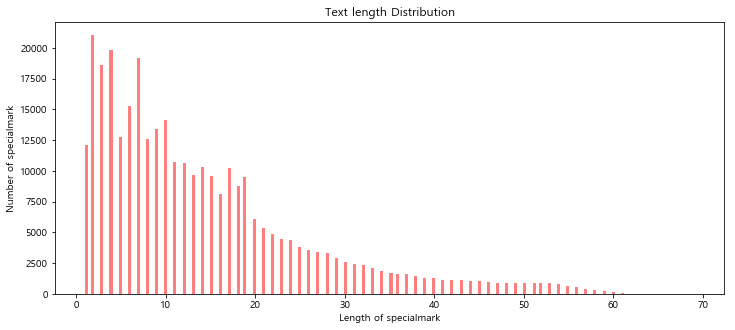

In [70]:
test_lenght = df['specialmark'].astype(str).apply(len)

plt.figure(figsize=(12,5))

plt.hist(test_lenght, bins=200, alpha=0.5, color='r', label='word')

plt.title('Text length Distribution')
plt.xlabel('Length of specialmark')
plt.ylabel('Number of specialmark')

plt.show()

In [71]:
print('특징 길이 최대 값: {}'.format(np.max(test_lenght)))
print('특징 길이 최소 값: {}'.format(np.min(test_lenght)))
print('특징 길이 평균 값: {:.2f}'.format(np.mean(test_lenght)))
print('특징 길이 표준편차: {:.2f}'.format(np.std(test_lenght)))
print('특징 길이 중간 값: {}'.format(np.median(test_lenght)))

# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('특징 길이 제 1 사분위: {}'.format(np.percentile(test_lenght, 25)))
print('특징 길이 제 3 사분위: {}'.format(np.percentile(test_lenght, 75)))

특징 길이 최대 값: 69
특징 길이 최소 값: 1
특징 길이 평균 값: 14.21
특징 길이 표준편차: 11.94
특징 길이 중간 값: 11.0
특징 길이 제 1 사분위: 5.0
특징 길이 제 3 사분위: 19.0


##### Word 단위 텍스트 길이 분포

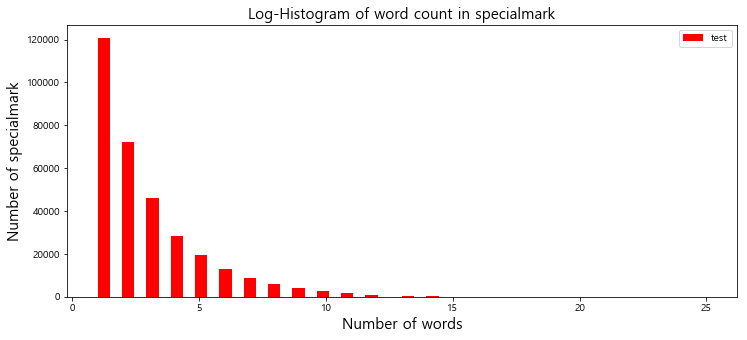

In [72]:
test_word_counts = df['specialmark'].astype(str).apply(lambda x:len(x.split(' ')))

plt.figure(figsize=(12, 5))
plt.hist(test_word_counts, bins=50, facecolor='r',label='test')
plt.title('Log-Histogram of word count in specialmark', fontsize=15)
# plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of specialmark', fontsize=15)

plt.show()

In [73]:
print('특징 단어 개수 최대 값: {}'.format(np.max(test_word_counts)))
print('특징 단어 개수 최소 값: {}'.format(np.min(test_word_counts)))
print('특징 단어 개수 평균 값: {:.2f}'.format(np.mean(test_word_counts)))
print('특징 단어 개수 표준편차: {:.2f}'.format(np.std(test_word_counts)))
print('특징 단어 개수 중간 값: {}'.format(np.median(test_word_counts)))
# 사분위의 대한 경우는 0~100 스케일로 되어있음
print('특징 단어 개수 제 1 사분위: {}'.format(np.percentile(test_word_counts, 25)))
print('특징 단어 개수 제 3 사분위: {}'.format(np.percentile(test_word_counts, 75)))

특징 단어 개수 최대 값: 25
특징 단어 개수 최소 값: 1
특징 단어 개수 평균 값: 2.79
특징 단어 개수 표준편차: 2.23
특징 단어 개수 중간 값: 2.0
특징 단어 개수 제 1 사분위: 1.0
특징 단어 개수 제 3 사분위: 4.0


### 7-3)  자연어 처리 
#### 1) 텍스트 전처리 

In [74]:
text_df = df[['desertionno','specialmark','processstate']]

In [75]:
# 정규표현식, 한글과 공백을 제외하고 모두 제거 
text_df['specialmark'] = text_df['specialmark'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힝]","")

#### 2) 불용어 정의 

In [76]:
stopwords=['의','가','며','들','는','됨','좀','걍','과','를','을','으로',
           '에','와','한','하다','개체','으나','관리','번호','면','함','쪽','줄','신고자'
           '혼종','고양이','묘','발견','추정','생후','개월','남음','믹스','구조','음','고']

#### 3) 토큰화 (tokenized) - 형태소 분석기 1. Mecab

In [77]:
tokenizer = Mecab()

tokenized=[]
for sentence in text_df['specialmark']:
    temp = []
    temp = tokenizer.morphs(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized.append(temp)
    
print(tokenized[:30])

[[], ['매우', '사나움'], ['매우', '사나움'], ['사나움'], ['귀', '갈색', '온순', '편'], ['유선', '처짐', '낑낑', '거림', '활발', '꼬리', '단미', '양귀', '외이염', '전신', '피부', '질환'], ['없'], ['생', '후월'], [], [], [], [], [], ['빨', '노목', '경계심', '심장', '사상충'], ['생', '후월'], [], [], [], [], [], [], ['낡', '은', '빨', '분홍', '목줄', '교통사고', '후지', '대퇴골', '골절'], ['순'], ['사람', '피함'], ['피부', '각질', '이', '심하', '호흡기', '증상', '이', '있', '온순'], ['온순', '당시', '목줄', '착용'], ['경계심', '이', '강함'], ['경계심', '이', '강함'], ['경계심', '이', '강함'], ['귀여움']]


In [78]:
new = pd.DataFrame(tokenized)
new

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,None,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,매우,사나움,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,매우,사나움,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,사나움,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,귀,갈색,온순,편,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324697,골목,신고자,임시,보호,중,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
324698,교통사고,기립,불능,원기,부족,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
324699,인공,수유,필요,원기,부족,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
324700,온순,하,조용,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


#### 3) 토큰화 (tokenized) - 형태소 분석기 2. Okt

In [81]:
sample_data = text_df.copy()

In [82]:
tokenizer2 = Okt()

In [83]:
tokenized2 = []
for sentence in sample_data['specialmark']:
    temp = []
    temp = tokenizer2.pos(sentence) # 토큰화
    temp = [word for word in temp if not word in stopwords] # 불용어 제거
    tokenized2.append(temp)

### 7-4)  단어 집합(Vocabulary) 생성
### 중복을 제거한 텍스트 내 총 단어의 집합(set)

In [84]:
# 단어-빈도수 조합으로 이루어진 단어집합 해시맵 vocab 생성

vocab = FreqDist(np.hstack(tokenized))
print('단어 집합의 크기 : {}'.format(len(vocab)))

단어 집합의 크기 : 23933


In [85]:
print('단어 [순]의 빈도수는? ', vocab['순'], '번')
print('단어 [온순]의 빈도수는? ', vocab['온순'], '번')
print('단어 [순하]의 빈도수는? ', vocab['순하'], '번')
print('단어 [순함]의 빈도수는? ', vocab['순함'], '번')

단어 [순]의 빈도수는?  18341 번
단어 [온순]의 빈도수는?  20331 번
단어 [순하]의 빈도수는?  4177 번
단어 [순함]의 빈도수는?  0 번


In [86]:
print('단어 [사나움]의 빈도수는? ', vocab['사나움'], '번')
print('단어 [사납]의 빈도수는? ', vocab['사납'], '번')
print('단어 [사나]의 빈도수는? ', vocab['사나'], '번')
print('단어 [사나운]의 빈도수는? ', vocab['사나운'], '번')

단어 [사나움]의 빈도수는?  4061 번
단어 [사납]의 빈도수는?  251 번
단어 [사나]의 빈도수는?  5 번
단어 [사나운]의 빈도수는?  276 번


### 7-5)  워드 임배딩
### Word2Vec

In [87]:
model = Word2Vec(tokenized, size=100, window=3, min_count=100, workers=4, iter=100, sg=1)
# size = 100 : 컨텐츠를 100차원의 벡터로 변환
# window = 5 : 주변 단어 앞 뒤로 3개 까지 확인
# min_count = 100 코퍼스 내 출현 빈도가 100 번 미만인 단어는 분석에서 제외
# workers = 4 : CPU 쿼드코어로 사용
# iter = 100 : 100번 반복 학습
# sg = 1 : CBOW -> 0 Skip-Gram -> 1 중 Skip-Gram 선택 

In [88]:
model_result1=model.wv.most_similar("온순", topn=100)
pp(model_result1)

[('조용', 0.5437841415405273),
 ('순하', 0.5384032726287842),
 ('순', 0.5321065783500671),
 ('순한', 0.5071381330490112),
 ('활달', 0.4871891140937805),
 ('사나움', 0.4575796127319336),
 ('활발', 0.44142287969589233),
 ('따르', 0.4341903030872345),
 ('발랄', 0.4322775602340698),
 ('외모', 0.4306347668170929),
 ('잘', 0.4208269715309143),
 ('온', 0.3900023400783539),
 ('따름', 0.3787700831890106),
 ('띠', 0.3727231025695801),
 ('음순', 0.371317982673645),
 ('끈', 0.36854979395866394),
 ('사람', 0.36813655495643616),
 ('착하', 0.36805784702301025),
 ('좋아함', 0.36739683151245117),
 ('견순', 0.36298227310180664),
 ('좋아하', 0.3604415953159332),
 ('노', 0.3580148220062256),
 ('호기심', 0.35686659812927246),
 ('친화', 0.35283994674682617),
 ('사나운', 0.35229381918907166),
 ('애교', 0.35227078199386597),
 ('산책', 0.34990352392196655),
 ('까칠', 0.3478952646255493),
 ('사회', 0.33947622776031494),
 ('훈련', 0.3386959433555603),
 ('경계심', 0.33194318413734436),
 ('애견', 0.3291863203048706),
 ('연두색', 0.32875901460647583),
 ('초록색', 0.3282095789909363),

In [89]:
model_result3=model.wv.most_similar("귀여움", topn=100)
pp(model_result3)

[('예쁨', 0.5913679599761963),
 ('착함', 0.5323203802108765),
 ('귀엽', 0.5290004014968872),
 ('귀여운', 0.48289141058921814),
 ('예', 0.4796221852302551),
 ('순', 0.44969677925109863),
 ('양말', 0.42658790946006775),
 ('이쁨', 0.424050509929657),
 ('발랄', 0.42274007201194763),
 ('예쁜', 0.4101215600967407),
 ('사랑', 0.3989480137825012),
 ('애교', 0.3933273255825043),
 ('이쁘', 0.38988420367240906),
 ('영리', 0.37902116775512695),
 ('엄청', 0.3770361542701721),
 ('예쁘', 0.37175917625427246),
 ('남매', 0.37092500925064087),
 ('들어옴', 0.37001127004623413),
 ('좋아함', 0.3635808229446411),
 ('필요', 0.3575758635997772),
 ('귀여워', 0.35398805141448975),
 ('형제', 0.3521620035171509),
 ('조용', 0.3517954349517822),
 ('지만', 0.34842821955680847),
 ('좋아하', 0.3478858172893524),
 ('아직', 0.34477972984313965),
 ('아가', 0.33130961656570435),
 ('딩', 0.3287225663661957),
 ('매력', 0.32817402482032776),
 ('중성화', 0.32362261414527893),
 ('삼', 0.3235151171684265),
 ('한지', 0.32334065437316895),
 ('미개', 0.322253942489624),
 ('생겼', 0.32061469554901123

In [90]:
# good_behavior 단어 도출
('순'),('순하'),('순한'),('온순'),('유순'),('조용'),('활달'),('활발'),('발랄'),('좋아하'),('따르'),('좋'),('따름'),('영리'),
('좋아함'),('친화'),('온'),('애교'),('착함'),('깨끗'),('착하'),('친숙'),('얌전'),('이쁨'),('귀여움'),('예쁨'),('귀여운'),
('귀여워'),('예쁘'),('매력'),('사랑'),('이쁘'),('이쁜'),('착한'),('호기심'),('밝'),('순둥이'),('아함')

('귀여워', '예쁘', '매력', '사랑', '이쁘', '이쁜', '착한', '호기심', '밝', '순둥이', '아함')

In [91]:
model_result2=model.wv.most_similar("사나움", topn=100)
pp(model_result2)

[('예민', 0.5307543873786926),
 ('사나운', 0.481650710105896),
 ('경계', 0.4678846299648285),
 ('사납', 0.4644625186920166),
 ('온순', 0.4575796127319336),
 ('공격', 0.4374008774757385),
 ('심심', 0.4306529462337494),
 ('강함', 0.42801815271377563),
 ('싸', 0.4249495565891266),
 ('경계심', 0.40232276916503906),
 ('까칠', 0.39900243282318115),
 ('물려', 0.3979947865009308),
 ('안면', 0.3934926688671112),
 ('입질', 0.3789796829223633),
 ('기재', 0.372466504573822),
 ('기립', 0.371113121509552),
 ('성심', 0.36943429708480835),
 ('포악', 0.36459535360336304),
 ('추후', 0.3587659001350403),
 ('미상', 0.3567299246788025),
 ('불가', 0.3563416302204132),
 ('마취', 0.35438525676727295),
 ('포획', 0.3540876507759094),
 ('병심', 0.3510149121284485),
 ('상세', 0.3490472733974457),
 ('순한', 0.34832262992858887),
 ('계', 0.3461560308933258),
 ('야생', 0.34606438875198364),
 ('틀', 0.34587350487709045),
 ('걸려', 0.3316526412963867),
 ('들개', 0.3261958956718445),
 ('순', 0.3228122889995575),
 ('기력', 0.3209114968776703),
 ('조용', 0.31878483295440674),
 ('정보', 0

In [92]:
model_result6=model.wv.most_similar("겁", topn=100)
pp(model_result6)

[('많', 0.563079833984375),
 ('입질', 0.5586743950843811),
 ('소심', 0.553717851638794),
 ('호기심', 0.5239895582199097),
 ('경계심', 0.4699705243110657),
 ('으르렁거림', 0.4624790549278259),
 ('얌전', 0.450374037027359),
 ('도망', 0.4485457241535187),
 ('사람', 0.4308565855026245),
 ('움찔', 0.40433603525161743),
 ('으르렁댐', 0.39850980043411255),
 ('조용', 0.39233654737472534),
 ('약간', 0.3901852071285248),
 ('유무', 0.37981849908828735),
 ('진드기', 0.3777465522289276),
 ('활발', 0.37760066986083984),
 ('얼룩무늬', 0.376259982585907),
 ('조금', 0.3720870018005371),
 ('애교', 0.36484822630882263),
 ('만지', 0.35669296979904175),
 ('상세', 0.35541480779647827),
 ('예민', 0.35071083903312683),
 ('발달', 0.3504176735877991),
 ('치석', 0.3473891317844391),
 ('경계', 0.3472737967967987),
 ('부정교합', 0.34696123003959656),
 ('적응', 0.3447083830833435),
 ('신차', 0.33834701776504517),
 ('주둥', 0.3364219665527344),
 ('덜', 0.3346366882324219),
 ('따름', 0.33263030648231506),
 ('지만', 0.32970958948135376),
 ('갈이', 0.3245657980442047),
 ('큼', 0.322526991367340

In [93]:
# sensitive 단어 도출
('사나움'),('사나운'),('예민'),('사납'),('경계'),('입질'),('공격'),('경계심'),('까칠'),('포악'),('위협'),('으르렁댐'),
('도망'),('소심'),('움찔'),('겁')

('도망', '소심', '움찔', '겁')

In [94]:
model_result4=model.wv.most_similar("사고", topn=100)
pp(model_result4)

[('교통사고', 0.7070300579071045),
 ('골절', 0.4891391396522522),
 ('불능', 0.4878721237182617),
 ('부상', 0.483589768409729),
 ('골반', 0.47932910919189453),
 ('기립', 0.45624667406082153),
 ('이상', 0.44456738233566284),
 ('손상', 0.43403786420822144),
 ('심다리', 0.42903217673301697),
 ('파열', 0.42497366666793823),
 ('보행', 0.4248308539390564),
 ('다친', 0.42474159598350525),
 ('출혈', 0.4213830828666687),
 ('혼수', 0.41094207763671875),
 ('척추', 0.40415892004966736),
 ('저하', 0.39994633197784424),
 ('의심', 0.3989957571029663),
 ('하반신', 0.39717215299606323),
 ('올무', 0.39270949363708496),
 ('예후', 0.3920130133628845),
 ('저체온증', 0.3885408043861389),
 ('원인', 0.3850940465927124),
 ('덫', 0.38479453325271606),
 ('후지', 0.3831923007965088),
 ('마비', 0.3822469711303711),
 ('코마', 0.37950611114501953),
 ('움직임', 0.379221647977829),
 ('구내염', 0.37848925590515137),
 ('움직이', 0.37225615978240967),
 ('복수', 0.3716094493865967),
 ('의식', 0.36618131399154663),
 ('쓰러져', 0.3646765947341919),
 ('뒷다리', 0.36309558153152466),
 ('전지', 0.3613326

In [95]:
# accident 단어 도출
('사고'),('교통사고'),('골절'),('골반'),('불능'),('기립'),('부상'),('예후'),('보행'),('마비'),('손상'),('출혈'),('혼수'),
('쓰러져'),('하반신'),('덫'),('올무'),('후구'),('후지'),('이상'),('당함'),('파열'),('다친'),('코마'),('척추'),('안면'),
('뒷다리'),('복수'),('의식'),('곤란'),('앞다리'),('신경'),('두부'),('척추골절'),('전지'),('응급'),('이송'),('아픈'),
('심각'),('소실'),('장기'),('병원'),('우측'),('괴사'),('물린'),('타박상'),('팽만'),('부종'),('탈장'),('돌출')

('심각', '소실', '장기', '병원', '우측', '괴사', '물린', '타박상', '팽만', '부종', '탈장', '돌출')

In [96]:
model_result5=model.wv.most_similar("질병", topn=100)
pp(model_result5)

[('전염성', 0.7378760576248169),
 ('질환', 0.5361762642860413),
 ('저하', 0.49535369873046875),
 ('환심', 0.47430574893951416),
 ('전염병', 0.45175474882125854),
 ('심안', 0.43811821937561035),
 ('노출', 0.42394620180130005),
 ('영양', 0.41889286041259766),
 ('감염', 0.4169897437095642),
 ('동래', 0.4046274423599243),
 ('안질', 0.39356839656829834),
 ('탈', 0.392230361700058),
 ('증상', 0.3782002925872803),
 ('후구', 0.36774230003356934),
 ('탈수', 0.3623390197753906),
 ('심다리', 0.3595600426197052),
 ('눈병', 0.3586726784706116),
 ('예후', 0.3542707562446594),
 ('불량', 0.349550724029541),
 ('영양실조', 0.3489576578140259),
 ('량안', 0.3455921411514282),
 ('금정', 0.3419555127620697),
 ('양원', 0.3393431305885315),
 ('호흡기', 0.3384978175163269),
 ('기생충', 0.33308637142181396),
 ('수심', 0.3330211043357849),
 ('수영', 0.3328264355659485),
 ('외부', 0.3316584825515747),
 ('기력', 0.33090633153915405),
 ('안구', 0.33002471923828125),
 ('장애', 0.32956063747406006),
 ('바이러스', 0.32785147428512573),
 ('혼수', 0.3247792422771454),
 ('고개', 0.32196137309074

In [97]:
# disease 단어 도출
('질병'),('전염성'),('질환'),('저하'),('감염'),('전염병'),('영양'),('노출'),('안질'),('원인'),('호흡기'),('탈수'),('증상'),
('저체온증'),('구내염'),('치석'),('진드기'),('모낭충'),('악액질'),('기생충'),('바이러스'),('영양실조'),('광견병'),('의심'),
('방치'),('눈병'),('기력'),('폐렴'),('장애'),('전신'),('움직임'),('외부'),('피부염'),('탈진'),('장염'),('쇠약'),('미상'),
('병심'),('곰팡이'),('비강'),('피부병'),('심장'),('사상충'),('쇄약'),('병심') 

('병심', '곰팡이', '비강', '피부병', '심장', '사상충', '쇄약', '병심')

### 7-6)  벡터화된 단어들로 Kmean Clustering

In [98]:
word_vectors = model.wv.syn0

num_clusters = int(word_vectors.shape[0]/50)

print(num_clusters)
num_clusters = int(num_clusters)

24


In [99]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [100]:
for c in range(num_clusters):
    # 클러스터 번호 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['공고', '호관', '리호', '호공', '낳', '아파트', '마을', '기견', '고개', '공', '주차장', '회중', '단지', '도로변', '동네', '창고', '파출소', '주택', '들어와', '마당', '떠돌', '공장', '밭', '나가', '민가']

cluster 1
['상태', '많', '겁', '매우', '칩', '건강', '경계', '경계심', '약간', '피부병', '사나움', '많이', '적', '예민', '사상충', '눈꼽', '으며', '성', '조금', '진드기', '마름', '월', '공격', '슴', '심하', '중성화', '야', '윔', '나이', '미흡', '화', '지저분', '야생', '입질', '병심', '중성', '온', '음성', '마른', '양성', '한쪽', '임신', '불편', '다소', '미상', '틀', '까칠', '오드', '엉켜', '검사', '마취', '파보', '음순', '끼', '말랐', '계', '걸려', '말라', '사나운', '피', '사납', '마르', '개이', '굶주림', '심심', '발발', '키트', '실명', '페르시안', '성심', '움', '정상', '피함', '벼룩', '오래됨', '불안', '심해', '다리다', '걸림', '낯가림', '뭉쳐', '엉망', '상충', '포악']

cluster 2
['순연', '제구', '호온']

cluster 3
['목줄', '착용', '옷', '빨간', '목걸이', '색목', '빨간색', '빨강', '파란', '파란색', '바탕', '리드', '노란', '하네스', '목테', '초록색', '끈', '파랑', '색옷', '줄무늬', '방울', '녹색', '주황색', '초록', '가죽', '노랑', '달린', '노란색', '붉', '체인', '핑크', '연두색', '하늘색', '라인', '띠', '쇠줄', '파', '태', '청색', '티', '몸줄', '묶여', '보라색', '낡', '남색', '쇠사슬', 

### 7-7)  PCA


In [101]:
# 특성 열 생성
df['good_behavior'] = 0
df['sensitive'] = 0
df['disease'] = 0
df['accident'] = 0

In [102]:
good_behavior_list = [('순'),('순하'),('순한'),('온순'),('유순'),('조용'),('활달'),('활발'),('발랄'),('좋아하'),('따르'),('좋'),('따름'),('영리'),
('좋아함'),('친화'),('온'),('애교'),('착함'),('깨끗'),('착하'),('친숙'),('얌전'),('이쁨'),('귀여움'),('예쁨'),('귀여운'),
('귀여워'),('예쁘'),('매력'),('사랑'),('이쁘'),('이쁜'),('착한'),('호기심'),('밝'),('순둥이'),('아함')]

sensitive_list = [('사나움'),('사나운'),('예민'),('사납'),('경계'),('입질'),('공격'),('경계심'),('까칠'),('포악'),('위협'),('으르렁댐'),
('도망'),('소심'),('움찔'),('겁')]

disease_list = [('사고'),('교통사고'),('골절'),('골반'),('불능'),('기립'),('부상'),('예후'),('보행'),('마비'),('손상'),('출혈'),('혼수'),
('쓰러져'),('하반신'),('덫'),('올무'),('후구'),('후지'),('이상'),('당함'),('파열'),('다친'),('코마'),('척추'),('안면'),
('뒷다리'),('복수'),('의식'),('곤란'),('앞다리'),('신경'),('두부'),('척추골절'),('전지'),('응급'),('이송'),('아픈'),
('심각'),('소실'),('장기'),('병원'),('우측'),('괴사'),('물린'),('타박상'),('팽만'),('부종'),('탈장'),('돌출')]

accident_list = [('질병'),('전염성'),('질환'),('저하'),('감염'),('전염병'),('영양'),('노출'),('안질'),('원인'),('호흡기'),('탈수'),('증상'),
('저체온증'),('구내염'),('치석'),('진드기'),('모낭충'),('악액질'),('기생충'),('바이러스'),('영양실조'),('광견병'),('의심'),
('방치'),('눈병'),('기력'),('폐렴'),('장애'),('전신'),('움직임'),('외부'),('피부염'),('탈진'),('장염'),('쇠약'),('미상'),
('병심'),('곰팡이'),('비강'),('피부병'),('심장'),('사상충'),('쇄약'),('병심') ]

In [103]:
for i in good_behavior_list:
    i.strip('()')
    
for i in sensitive_list:
    i.strip('()')  
    
for i in disease_list:
    i.strip('()')
    
for i in accident_list:
    i.strip('()')

In [104]:
def good_behavior(x):
    
    for i in range(len(good_behavior_list)):
        if x.__contains__(good_behavior_list[i]):
            return 1

def sensitive(x):

    for i in range(len(sensitive_list)):
        if x.__contains__(sensitive_list[i]):
            return 1
        
def disease(x):     

    for i in range(len(disease_list)):
        if x.__contains__(disease_list[i]):
            return 1
        
def accident(x):         

    for i in range(len(accident_list)):
        if x.__contains__(accident_list[i]):
            return 1


df.good_behavior = text_df.specialmark.map(good_behavior)
df.sensitive = text_df.specialmark.map(sensitive)
df.disease = text_df.specialmark.map(disease)
df.accident = text_df.specialmark.map(accident)


In [108]:
df.iloc[:5, :]

,desertionno,popfile,happendt,happenplace,knm,colorcd,age,weight,noticeno,noticesdt,...,yellow_col,kindcd,weight_float,noticesdt_year,noticesdt_month,noticesdt_day,good_behavior,sensitive,disease,accident
0,448535202001458,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-13,김해시 주촌면 서부로1563번길 54,믹스견,검흰,5.0,8,경남-김해-2020-01466,2020-10-15,...,0,114.0,8.0,2020,10,15,NaN,NaN,NaN,NaN
1,446500202000046,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,군내면 송산길 118,믹스견,황색,2.0,7,전남-진도-2020-00046,2020-10-15,...,1,114.0,7.0,2020,10,15,NaN,1.0,NaN,NaN
2,446500202000045,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,군내면 송산길 118,믹스견,백색,1.0,10,전남-진도-2020-00045,2020-10-15,...,0,114.0,10.0,2020,10,15,NaN,1.0,NaN,NaN
3,446500202000044,http://www.animal.go.kr/files/shelter/2020/10/...,2020-10-13,고군면 가계길 26-10,믹스견,황색,2.0,15,전남-진도-2020-00044,2020-10-15,...,1,114.0,15.0,2020,10,15,NaN,1.0,NaN,NaN
4,446499202000215,http://www.animal.go.kr/files/shelter/2020/07/...,2020-10-13,금일 월송리 마을야산,믹스견,흰색,4.0,14,전남-완도-2020-00218,2020-10-15,...,0,114.0,14.0,2020,10,15,1.0,NaN,NaN,NaN


In [ ]:
df.to_csv('./EDA_data', index=False)